In [ ]:
%matplotlib inline


# RandOm Convolutional KErnel Transform (ROCKET)

The RandOm Convolutional KErnel Transform (ROCKET) algorithm randomly
generates a great variety of convolutional kernels and extracts two
features for each convolution:
the maximum and the proportion of positive values.
This example illustrates basic usage of this algorithm and plots the
weights of the most relevant kernels according to mutual information.
It is implemented as :class:`pyts.transformation.ROCKET`.


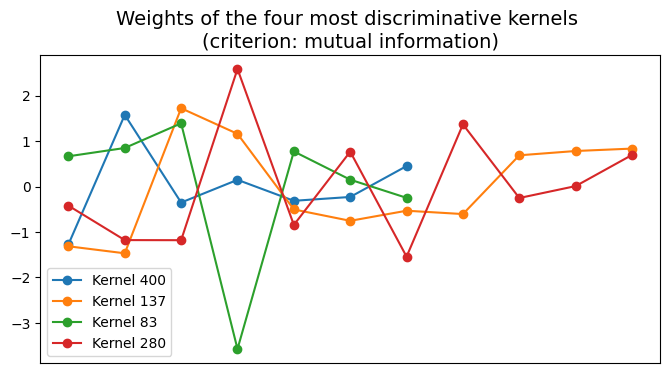

In [1]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ROCKET
from sklearn.feature_selection import mutual_info_classif

# Toy dataset
X, _, y, _ = load_gunpoint(return_X_y=True)

# ROCKET transformation
rocket = ROCKET(n_kernels=500, random_state=42)
X_rocket = rocket.fit_transform(X)

# Find the most discriminative kernels
n_kernels = 4
mutual_info = mutual_info_classif(X_rocket, y, random_state=42)
indices = np.floor_divide(np.argsort(mutual_info), 2)[-n_kernels:]

# Visualize the weights of the most discriminative kernels
plt.figure(figsize=(8, 4))
for idx in indices:
    plt.plot(rocket.weights_[idx, :rocket.length_[idx]], 'o-',
             label='Kernel {}'.format(idx))
plt.legend(loc='best')
plt.title('Weights of the four most discriminative kernels \n'
          '(criterion: mutual information)', fontsize=14)
plt.xticks([])
plt.show()